In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer  # Adjusted import
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, confusion_matrix, precision_score
)
from scipy.sparse import hstack, csr_matrix
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Input
from sklearn import preprocessing
from tensorflow.keras.models import Model
import scipy.sparse as sp
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import learning_curve, cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Ensuring libraries and versions are compatible
print("Successfully imported all libraries!")


Successfully imported all libraries!


In [3]:
# Ensure necessary NLTK datasets are downloaded
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tirol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tirol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
file_path = r'D:\Downloads\fake_job_postings.csv'
df = pd.read_csv(file_path)

In [5]:
# 1. Basic Information and Summary
print("Basic Info:\n")
df.info()


Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  obj

In [6]:
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
df.isnull().sum()


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
df.duplicated().sum()


0

In [9]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

In [10]:
print(len(categorical))
print(categorical)

13
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [11]:
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [12]:
df[numerical].describe()


,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df[numerical][df[numerical]=='?'].count()


job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [14]:
df[categorical][df[categorical]=='?'].count()


title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
dtype: int64

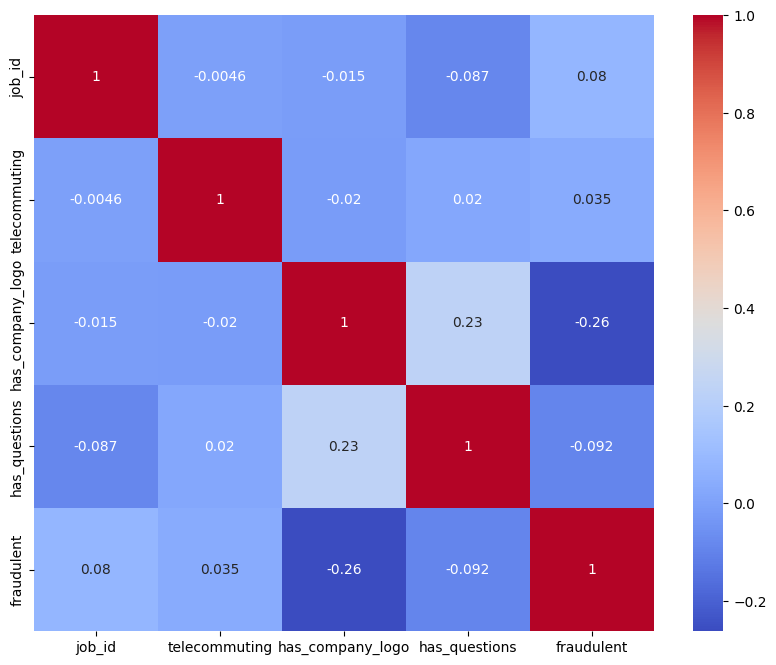

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the figure size
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Plot the heatmap
sns.heatmap(df[numerical].corr(), cmap='coolwarm', annot=True, annot_kws={"size": 10})

# Show the plot
plt.show()


In [16]:
numerical_to_drop=['telecommuting','has_questions']

df.drop(columns=numerical_to_drop, inplace=True)

In [17]:
df['country'] = df['location'].str.split(',').str[0]

In [18]:
df.nunique()


job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11967
benefits                6204
has_company_logo           2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
country                   90
dtype: int64

C:\Users\tirol\AppData\Local\Temp\ipykernel_15276\2584716319.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='fraudulent',palette='pastel')


<Axes: xlabel='fraudulent', ylabel='count'>

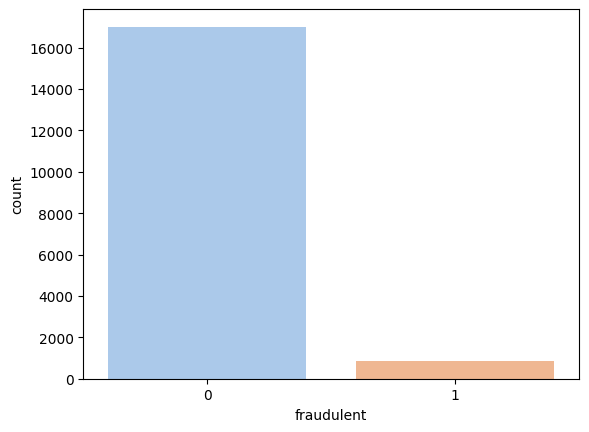

In [19]:
sns.countplot(data=df,x='fraudulent',palette='pastel')


In [20]:
fake=df[df['fraudulent']==1]
fake.shape

(866, 17)

In [21]:
real=df[df['fraudulent']==0]
real.shape

(17014, 17)

In [22]:
df.shape


(17880, 17)

In [23]:
fake=fake.sample(13937,replace=True)


In [24]:
real.shape,fake.shape


((17014, 17), (13937, 17))

In [25]:
df = pd.concat([fake, real], ignore_index=True)
df.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,0,17643,Immediate Opening : Linux Administrator for Ba...,BH,Information Technology,NaN,NaN,Greetings from VAM SYSTEMS…..VAM SYSTEMS is a ...,Skill Set required:Red Hat Certified Engineer ...,NaN,0,NaN,NaN,NaN,NaN,NaN,1,BH
1,1,17809,"vacancies,nannies,cooks,drivers and housekeepe...","US, FL,",NaN,3700-3800,NaN,We are hiring home / domestic #URL_a611accdf5e...,We are hiring home / domestic #URL_a611accdf5e...,NaN,0,Full-time,Not Applicable,Unspecified,Hospital & Health Care,Health Care Provider,1,US
2,2,17731,Licensed Life Insurance Agent,"US, WA, Seattle",Sales,NaN,NaN,"We need someone who is smart, funny, great wit...",NaN,NaN,1,Full-time,Not Applicable,High School or equivalent,Insurance,Sales,1,US
3,3,17634,Call Center Representative,"US, PA, Philadelphia",Sales,NaN,We are a nationwide recruiting and training fi...,"Want to work in a fast-paced, dynamic environm...",Clean Drug/Clean Background,NaN,1,NaN,NaN,NaN,NaN,NaN,1,US
4,4,4350,Structural Engineer,"US, TX, Houston",Engineering,NaN,NaN,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• Tech...,We offer • Friendly colleagues in an industry ...,0,NaN,NaN,NaN,Oil & Energy,Engineering,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30946,30946,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
30947,30947,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
30948,30948,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,Full-time,NaN,NaN,NaN,NaN,0,US
30949,30949,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG


C:\Users\tirol\AppData\Local\Temp\ipykernel_15276\2584716319.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='fraudulent',palette='pastel')


<Axes: xlabel='fraudulent', ylabel='count'>

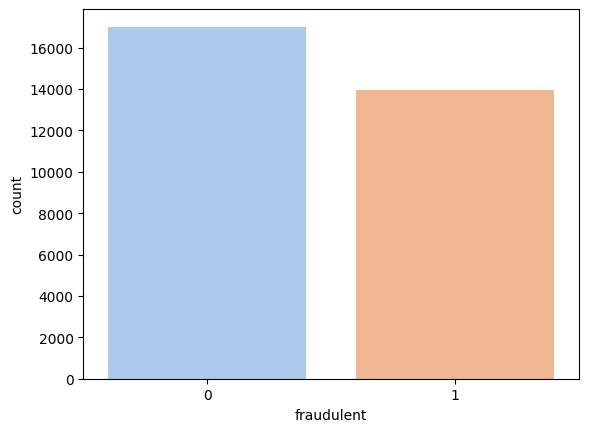

In [26]:
sns.countplot(data=df,x='fraudulent',palette='pastel')


C:\Users\tirol\AppData\Local\Temp\ipykernel_15276\3793697970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='country', order=country, palette='pastel')


Text(0, 0.5, 'No. of Jobs')

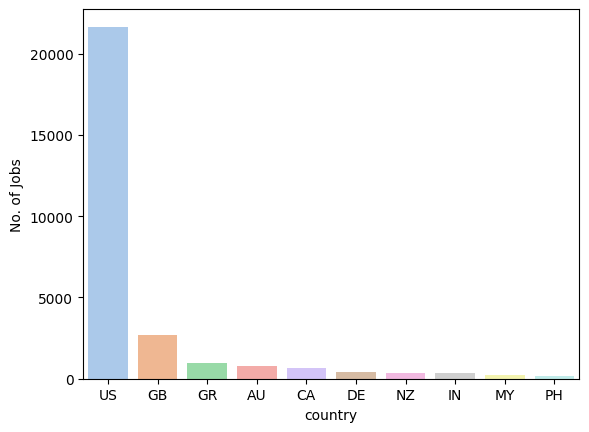

In [27]:
country = df['country'].value_counts().nlargest(10).index.tolist()
ax=sns.countplot(data=df, x='country', order=country, palette='pastel')
ax.set_ylabel('No. of Jobs')

C:\Users\tirol\AppData\Local\Temp\ipykernel_15276\1041902389.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='employment_type', palette='pastel')


Text(0, 0.5, 'No. of Jobs')

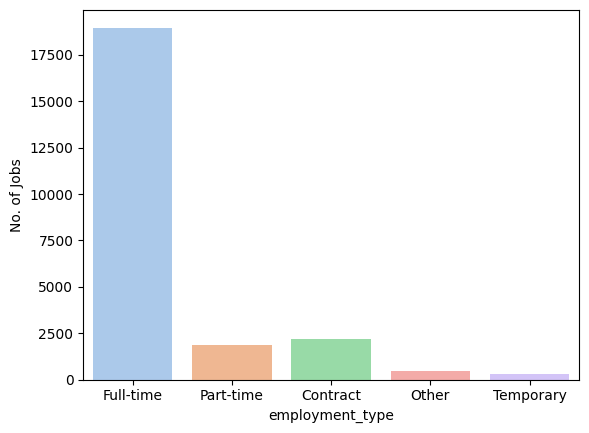

In [28]:
ax=sns.countplot(data=df, x='employment_type', palette='pastel')
ax.set_ylabel('No. of Jobs')

In [29]:
df


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,17643,Immediate Opening : Linux Administrator for Ba...,BH,Information Technology,NaN,NaN,Greetings from VAM SYSTEMS…..VAM SYSTEMS is a ...,Skill Set required:Red Hat Certified Engineer ...,NaN,0,NaN,NaN,NaN,NaN,NaN,1,BH
1,17809,"vacancies,nannies,cooks,drivers and housekeepe...","US, FL,",NaN,3700-3800,NaN,We are hiring home / domestic #URL_a611accdf5e...,We are hiring home / domestic #URL_a611accdf5e...,NaN,0,Full-time,Not Applicable,Unspecified,Hospital & Health Care,Health Care Provider,1,US
2,17731,Licensed Life Insurance Agent,"US, WA, Seattle",Sales,NaN,NaN,"We need someone who is smart, funny, great wit...",NaN,NaN,1,Full-time,Not Applicable,High School or equivalent,Insurance,Sales,1,US
3,17634,Call Center Representative,"US, PA, Philadelphia",Sales,NaN,We are a nationwide recruiting and training fi...,"Want to work in a fast-paced, dynamic environm...",Clean Drug/Clean Background,NaN,1,NaN,NaN,NaN,NaN,NaN,1,US
4,4350,Structural Engineer,"US, TX, Houston",Engineering,NaN,NaN,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• Tech...,We offer • Friendly colleagues in an industry ...,0,NaN,NaN,NaN,Oil & Energy,Engineering,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30946,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
30947,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
30948,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,Full-time,NaN,NaN,NaN,NaN,0,US
30949,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG


C:\Users\tirol\AppData\Local\Temp\ipykernel_15276\2944595189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='required_experience', palette='pastel')


Text(0, 0.5, 'No. of Jobs')

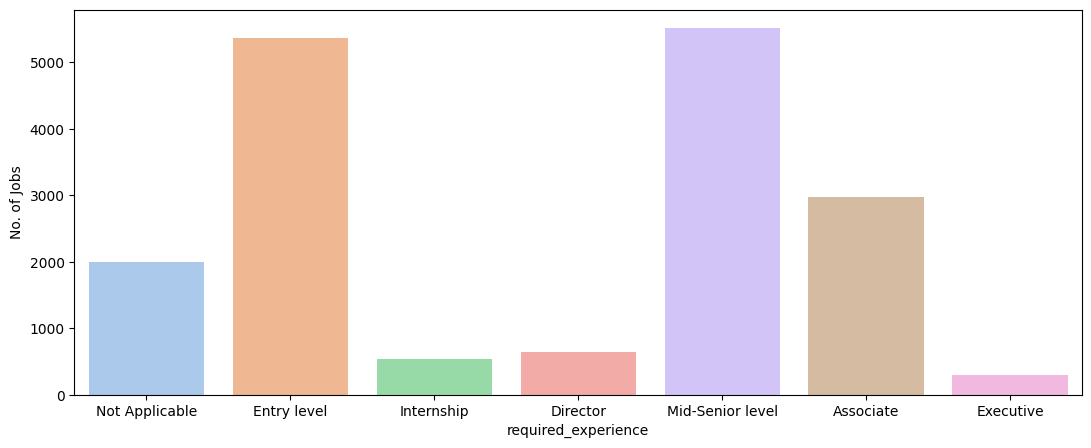

In [30]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x='required_experience', palette='pastel')
ax.set_ylabel('No. of Jobs')

C:\Users\tirol\AppData\Local\Temp\ipykernel_15276\2324035837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='required_education', order=country, palette='pastel')


Text(0, 0.5, 'No. of Jobs')

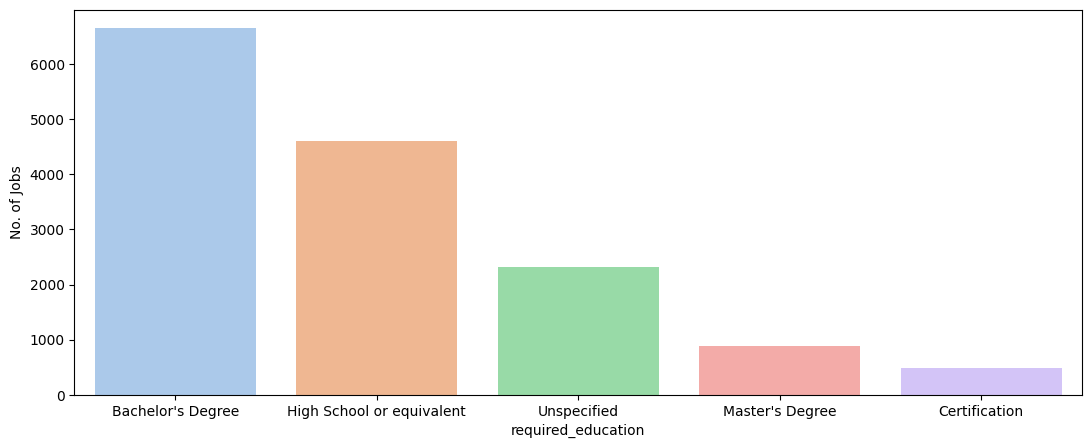

In [31]:
plt.figure(figsize=(13,5))
country = df['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=df, x='required_education', order=country, palette='pastel')
ax.set_ylabel('No. of Jobs')

In [32]:
df.fillna(' ',inplace=True)

In [33]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
dtype: int64

In [34]:
df


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,17643,Immediate Opening : Linux Administrator for Ba...,BH,Information Technology,,,Greetings from VAM SYSTEMS…..VAM SYSTEMS is a ...,Skill Set required:Red Hat Certified Engineer ...,,0,,,,,,1,BH
1,17809,"vacancies,nannies,cooks,drivers and housekeepe...","US, FL,",,3700-3800,,We are hiring home / domestic #URL_a611accdf5e...,We are hiring home / domestic #URL_a611accdf5e...,,0,Full-time,Not Applicable,Unspecified,Hospital & Health Care,Health Care Provider,1,US
2,17731,Licensed Life Insurance Agent,"US, WA, Seattle",Sales,,,"We need someone who is smart, funny, great wit...",,,1,Full-time,Not Applicable,High School or equivalent,Insurance,Sales,1,US
3,17634,Call Center Representative,"US, PA, Philadelphia",Sales,,We are a nationwide recruiting and training fi...,"Want to work in a fast-paced, dynamic environm...",Clean Drug/Clean Background,,1,,,,,,1,US
4,4350,Structural Engineer,"US, TX, Houston",Engineering,,,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• Tech...,We offer • Friendly colleagues in an industry ...,0,,,,Oil & Energy,Engineering,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30946,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,,Computer Software,Sales,0,CA
30947,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
30948,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,Full-time,,,,,0,US
30949,17879,Graphic Designer,"NG, LA, Lagos",,,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG


In [35]:
df['combined_text'] = df[['title', 'location', 'salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department']].apply(lambda x: ' '.join(x), axis=1)

df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department'], inplace=True)

In [36]:
df.drop('country',axis=1,inplace=True)

In [37]:
df.head()


,job_id,has_company_logo,fraudulent,combined_text
0,17643,0,1,Immediate Opening : Linux Administrator for Ba...
1,17809,0,1,"vacancies,nannies,cooks,drivers and housekeepe..."
2,17731,1,1,"Licensed Life Insurance Agent US, WA, Seattle ..."
3,17634,1,1,"Call Center Representative US, PA, Philadelphi..."
4,4350,0,1,"Structural Engineer US, TX, Houston Corpor..."


In [38]:
fake=df[df['fraudulent']==1]['combined_text']
real=df[df['fraudulent']==0]['combined_text']

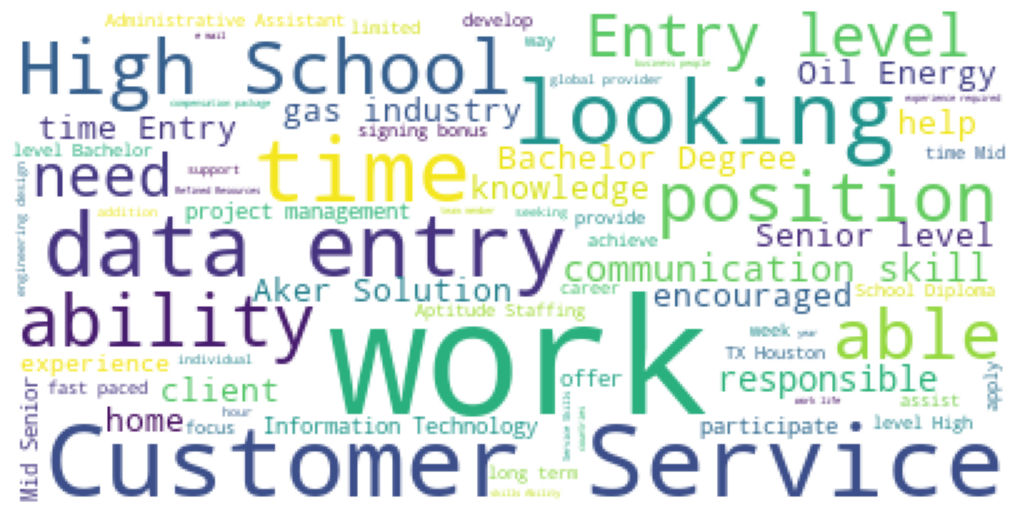

In [39]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

wordcloud = WordCloud(min_font_size=4,width=400, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(fake))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

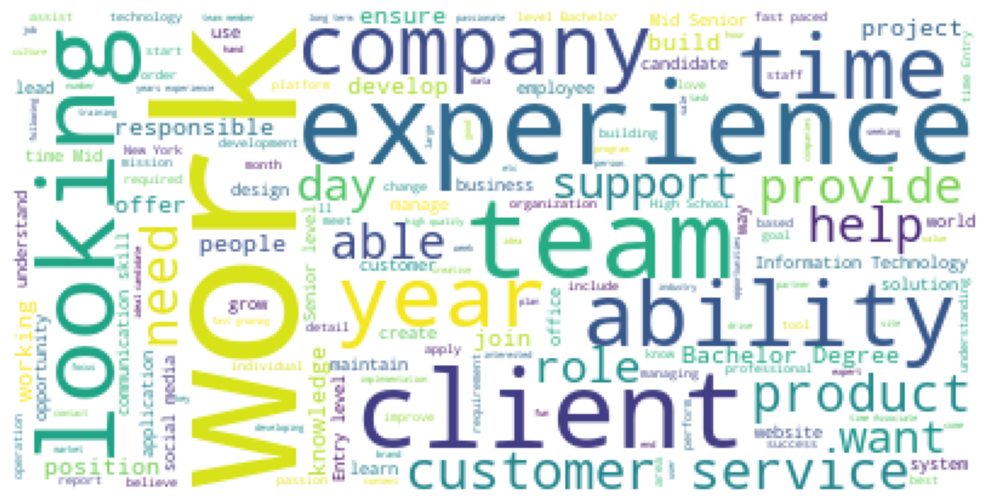

In [40]:
wordcloud = WordCloud(min_font_size=4,width=400, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(real))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

# Feature Engineering

In [80]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [82]:
df['combined_text']=df['combined_text'].apply(clean_text)

In [83]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,17643,0,1,immediate opening linux administrator bahrain ...
1,17809,0,1,vacancies nannies cooks drivers housekeepers n...
2,17731,1,1,licensed life insurance agent us wa seattle ne...
3,17634,1,1,call center representative us pa philadelphia ...
4,4350,0,1,structural engineer us tx houston corporate ov...


### Data Normalization

In [85]:
nlp = spacy.load("en_core_web_sm")

def normalize_text(text):
    # Tokenize the text and apply lemmatization
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

In [ ]:
df['combined_text']=df['combined_text'].apply(normalize_text)


## Feature Extraction

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt') 

In [ ]:
text_columns = ['combined_text']

df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)
df['pos_features'] = df['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))

X_train = df.drop('fraudulent', axis=1)
y_train = df['fraudulent']

vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = vectorizer.fit_transform(X_train['combined_text'])
pos_matrix_train = vectorizer.transform(X_train['pos_features'])
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

with open('countvectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Model training and selection

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from collections import Counter  # Import Counter
from imblearn.over_sampling import SMOTE

# Assuming df is already defined, extract the target variable
y = df['fraudulent'].values

# Check class distribution
print("Class distribution in dataset:", dict(Counter(y)))

In [ ]:
X=combined_matrix_train
y=df['fraudulent'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
# Resample the dataset if imbalanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# Scale features
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


### Logistic Regression 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logistic_clf = LogisticRegression(max_iter=500, C=0.1)  # Added regularization
logistic_cv_scores = cross_val_score(logistic_clf, X_train, y_train, cv=5)
logistic_clf.fit(X_train, y_train)
logistic_y_pred = logistic_clf.predict(X_test)
logistic_y_pred_proba = logistic_clf.predict_proba(X_test)[:, 1]


Logistic Regression Evaluation Metrics:
Cross-validation scores        : [0.96859504 0.97116621 0.9744673  0.96601763 0.97373255]

Average cross-validation score : 0.9708

Test set precision             : 0.9745

Test set recall                : 1.0000

Test set F1 score              : 0.9871

Test set ROC-AUC score         : 1.0000
Test set accuracy              : 0.9869


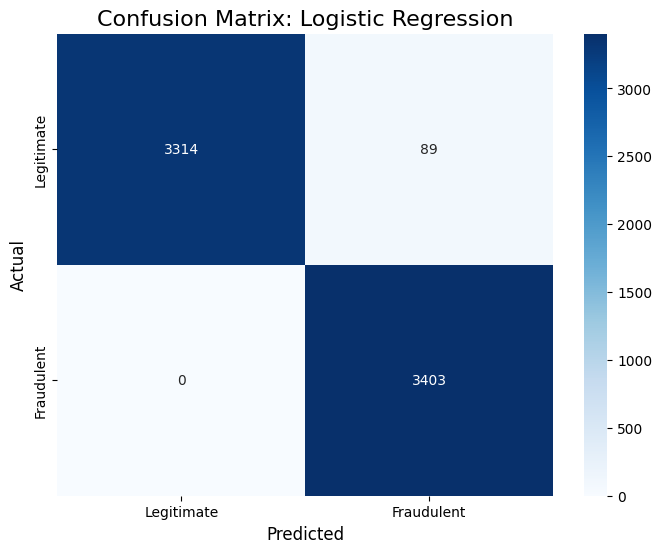

In [59]:

print("\nLogistic Regression Evaluation Metrics:")
print("=" * 60)

# Cross-validation scores
print(f"Cross-validation scores        : {logistic_cv_scores}")
print()
print(f"Average cross-validation score : {logistic_cv_scores.mean():.4f}")
print()

# Test set metrics
print(f"Test set precision             : {precision_score(y_test, logistic_y_pred):.4f}")
print()
print(f"Test set recall                : {recall_score(y_test, logistic_y_pred):.4f}")
print()
print(f"Test set F1 score              : {f1_score(y_test, logistic_y_pred):.4f}")
print()
print(f"Test set ROC-AUC score         : {roc_auc_score(y_test, logistic_y_pred_proba):.4f}")
print("=" * 60)
print(f"Test set accuracy              : {accuracy_score(y_test, logistic_y_pred):.4f}")
print("=" * 60)

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, logistic_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.title("Confusion Matrix: Logistic Regression", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks([0.5, 1.5], ['Legitimate', 'Fraudulent'], fontsize=10)
plt.yticks([0.5, 1.5], ['Legitimate', 'Fraudulent'], fontsize=10)
plt.show()

### KNN (K-Nearest Neighbors)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)  # Set the number of neighbors
knn_cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=2)  # Cross-validation
knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)
knn_y_pred_proba = knn_clf.predict_proba(X_test)[:, 1]


K-Nearest Neighbors Evaluation Metrics:
Cross-validation scores        : [0.66769525 0.67129528]

Average cross-validation score : 0.6695

Test set precision             : 0.6663

Test set recall                : 1.0000

Test set F1 score              : 0.7998

Test set ROC-AUC score         : 0.7496
Test set accuracy              : 0.7496


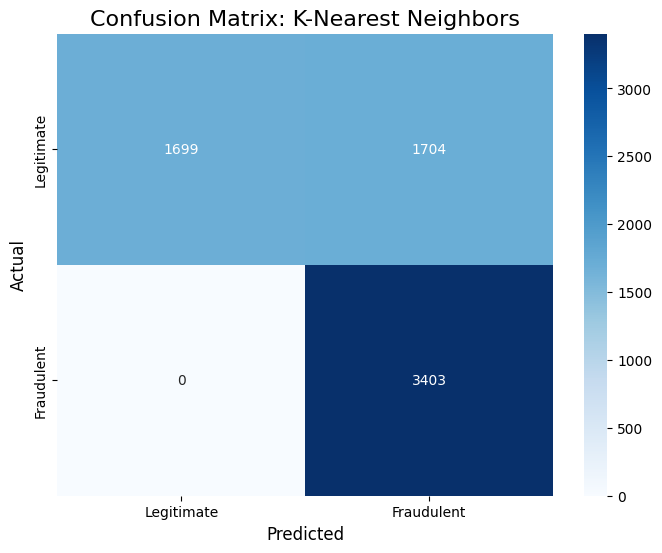

In [62]:

print("\nK-Nearest Neighbors Evaluation Metrics:")
print("=" * 60)

# Cross-validation scores
print(f"Cross-validation scores        : {knn_cv_scores}")
print()
print(f"Average cross-validation score : {knn_cv_scores.mean():.4f}")
print()

# Test set metrics
print(f"Test set precision             : {precision_score(y_test, knn_y_pred):.4f}")
print()
print(f"Test set recall                : {recall_score(y_test, knn_y_pred):.4f}")
print()
print(f"Test set F1 score              : {f1_score(y_test, knn_y_pred):.4f}")
print()
print(f"Test set ROC-AUC score         : {roc_auc_score(y_test, knn_y_pred_proba):.4f}")
print("=" * 60)
print(f"Test set accuracy              : {accuracy_score(y_test, knn_y_pred):.4f}")
print("=" * 60)

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.title("Confusion Matrix: K-Nearest Neighbors", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks([0.5, 1.5], ['Legitimate', 'Fraudulent'], fontsize=10)
plt.yticks([0.5, 1.5], ['Legitimate', 'Fraudulent'], fontsize=10)
plt.show()

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)  # Set hyperparameters
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)  # Cross-validation
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]


Random Forest Classifier Evaluation Metrics:
Cross-validation scores        : [0.85601469 0.89678604 0.90080823 0.87986774 0.88317414]

Average cross-validation score : 0.8833

Test set precision             : 0.9314

Test set recall                : 0.8780

Test set F1 score              : 0.9039

Test set ROC-AUC score         : 0.9719
Test set accuracy              : 0.9067


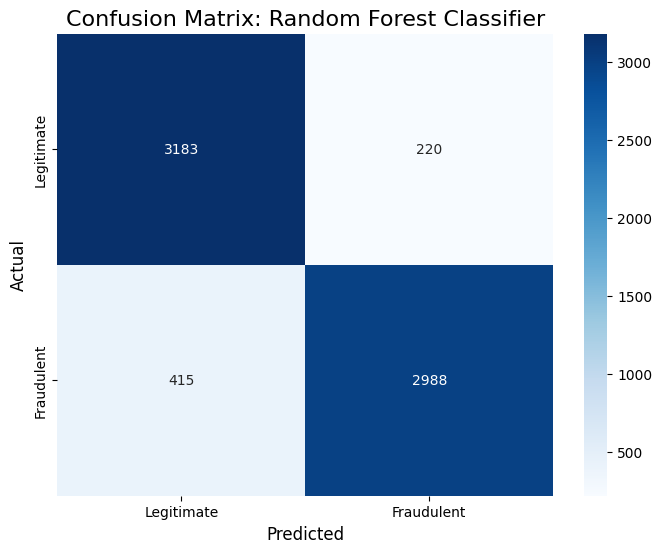

In [65]:
print("\nRandom Forest Classifier Evaluation Metrics:")
print("=" * 60)

# Cross-validation scores
print(f"Cross-validation scores        : {rf_cv_scores}")
print()
print(f"Average cross-validation score : {rf_cv_scores.mean():.4f}")
print()

# Test set metrics
print(f"Test set precision             : {precision_score(y_test, rf_y_pred):.4f}")
print()
print(f"Test set recall                : {recall_score(y_test, rf_y_pred):.4f}")
print()
print(f"Test set F1 score              : {f1_score(y_test, rf_y_pred):.4f}")
print()
print(f"Test set ROC-AUC score         : {roc_auc_score(y_test, rf_y_pred_proba):.4f}")
print("=" * 60)
print(f"Test set accuracy              : {accuracy_score(y_test, rf_y_pred):.4f}")
print("=" * 60)

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.title("Confusion Matrix: Random Forest Classifier", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks([0.5, 1.5], ['Legitimate', 'Fraudulent'], fontsize=10)
plt.yticks([0.5, 1.5], ['Legitimate', 'Fraudulent'], fontsize=10)
plt.show()

### XGBoost

In [67]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=100,        # Number of trees
    learning_rate=0.1,       # Step size shrinkage
    max_depth=6,             # Maximum tree depth
    min_child_weight=1,      # Minimum sum of instance weight (hessian) for child nodes
    subsample=0.8,           # Subsample ratio of the training data
    colsample_bytree=0.8,    # Subsample ratio of features
    use_label_encoder=False, # Prevent unnecessary warning
    eval_metric="logloss"    # Evaluation metric
)
xgb_cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
xgb_y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

C:\Users\tirol\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:45:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\tirol\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:48:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\tirol\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:50:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg,


XGBoost Classifier Evaluation Metrics:
Cross-validation scores        : [0.98181818 0.98420569 0.98457017 0.98457017 0.98806025]

Average cross-validation score : 0.9846

Test set precision             : 0.9775

Test set recall                : 0.9965

Test set F1 score              : 0.9869

Test set ROC-AUC score         : 0.9994
Test set accuracy              : 0.9868


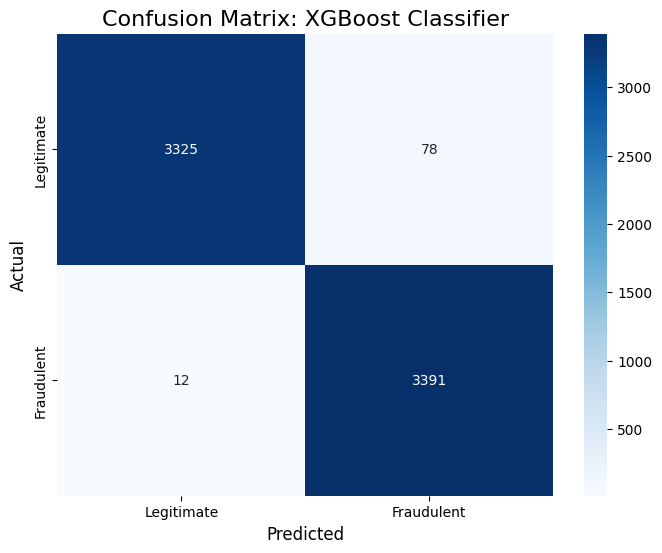

In [68]:
print("\nXGBoost Classifier Evaluation Metrics:")
print("=" * 60)

# Cross-validation scores
print(f"Cross-validation scores        : {xgb_cv_scores}")
print()
print(f"Average cross-validation score : {xgb_cv_scores.mean():.4f}")
print()

# Test set metrics
print(f"Test set precision             : {precision_score(y_test, xgb_y_pred):.4f}")
print()
print(f"Test set recall                : {recall_score(y_test, xgb_y_pred):.4f}")
print()
print(f"Test set F1 score              : {f1_score(y_test, xgb_y_pred):.4f}")
print()
print(f"Test set ROC-AUC score         : {roc_auc_score(y_test, xgb_y_pred_proba):.4f}")
print("=" * 60)
print(f"Test set accuracy              : {accuracy_score(y_test, xgb_y_pred):.4f}")
print("=" * 60)

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, xgb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.title("Confusion Matrix: XGBoost Classifier", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks([0.5, 1.5], ['Legitimate', 'Fraudulent'], fontsize=10)
plt.yticks([0.5, 1.5], ['Legitimate', 'Fraudulent'], fontsize=10)
plt.show()

 ### lightGBM

In [70]:
# LightGBM Model
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, 
                             learning_rate=0.1, n_estimators=100)
lgb_cv_scores = cross_val_score(lgb_clf, X_train, y_train, cv=5)
lgb_clf.fit(X_train, y_train)
lgb_y_pred = lgb_clf.predict(X_test)
lgb_y_pred_proba = lgb_clf.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 10888, number of negative: 10889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.785576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135578
[LightGBM] [Info] Number of data points in the train set: 21777, number of used features: 51198
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499977 -> initscore=-0.000092
[LightGBM] [Info] Start training from score -0.000092
[LightGBM] [Info] Number of positive: 10889, number of negative: 10888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.041060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135473
[LightGBM] [Info] Number of data points in the train set: 21777, number of used features: 51207
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500023 -> initscore=0.


LightGBM Classifier Evaluation Metrics:
Cross-validation scores        : [0.99504132 0.99375574 0.99540779 0.99614254 0.99669361]

Average cross-validation score : 0.9954

Test set precision             : 0.9959

Test set recall                : 1.0000

Test set F1 score              : 0.9979

Test set ROC-AUC score         : 1.0000
Test set accuracy              : 0.9979


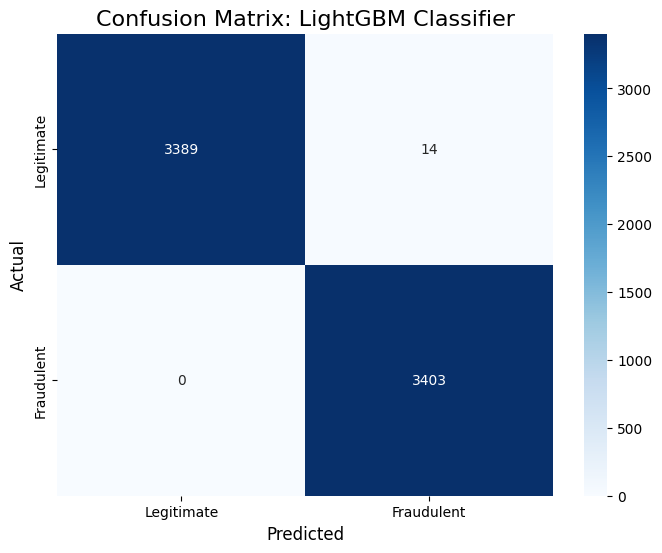

In [71]:
print("\nLightGBM Classifier Evaluation Metrics:")
print("=" * 60)

# Cross-validation scores
print(f"Cross-validation scores        : {lgb_cv_scores}")
print()
print(f"Average cross-validation score : {lgb_cv_scores.mean():.4f}")
print()

# Test set metrics
print(f"Test set precision             : {precision_score(y_test, lgb_y_pred):.4f}")
print()
print(f"Test set recall                : {recall_score(y_test, lgb_y_pred):.4f}")
print()
print(f"Test set F1 score              : {f1_score(y_test, lgb_y_pred):.4f}")
print()
print(f"Test set ROC-AUC score         : {roc_auc_score(y_test, lgb_y_pred_proba):.4f}")
print("=" * 60)
print(f"Test set accuracy              : {accuracy_score(y_test, lgb_y_pred):.4f}")
print("=" * 60)

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, lgb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.title("Confusion Matrix: LightGBM Classifier", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks([0.5, 1.5], ['Legitimate', 'Fraudulent'], fontsize=10)
plt.yticks([0.5, 1.5], ['Legitimate', 'Fraudulent'], fontsize=10)
plt.show()

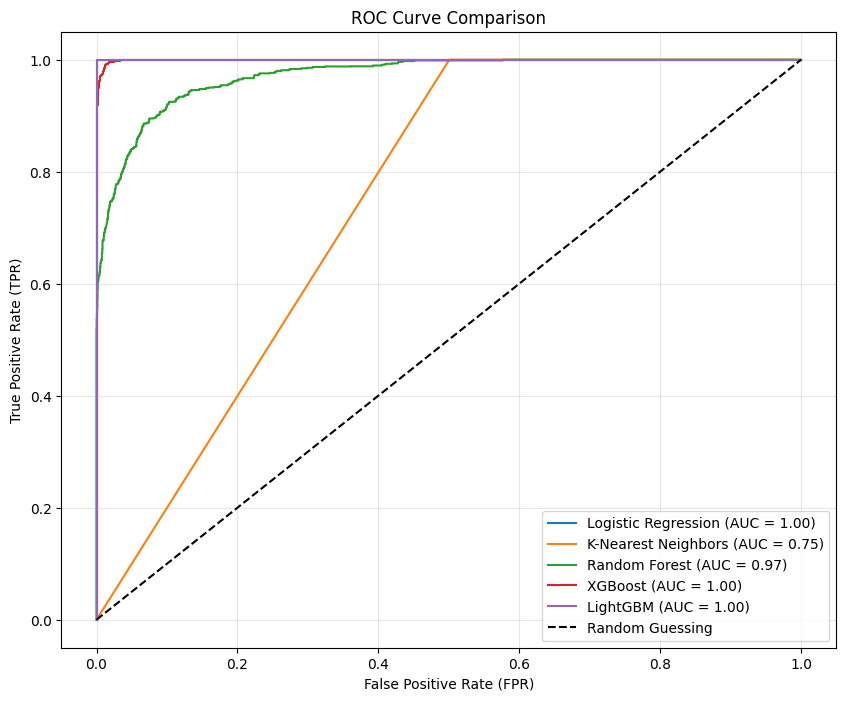

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC and AUC for Logistic Regression
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_y_pred_proba)
logistic_auc = roc_auc_score(y_test, logistic_y_pred_proba)

# ROC and AUC for K-Nearest Neighbors
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_pred_proba)
knn_auc = roc_auc_score(y_test, knn_y_pred_proba)

# ROC and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_proba)
rf_auc = roc_auc_score(y_test, rf_y_pred_proba)

# ROC and AUC for XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_pred_proba)
xgb_auc = roc_auc_score(y_test, xgb_y_pred_proba)

# ROC and AUC for LightGBM
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_y_pred_proba)
lgb_auc = roc_auc_score(y_test, lgb_y_pred_proba)

# Plotting all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'K-Nearest Neighbors (AUC = {knn_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(lgb_fpr, lgb_tpr, label=f'LightGBM (AUC = {lgb_auc:.2f})')

# Plot diagonal line for reference (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Formatting the plot
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


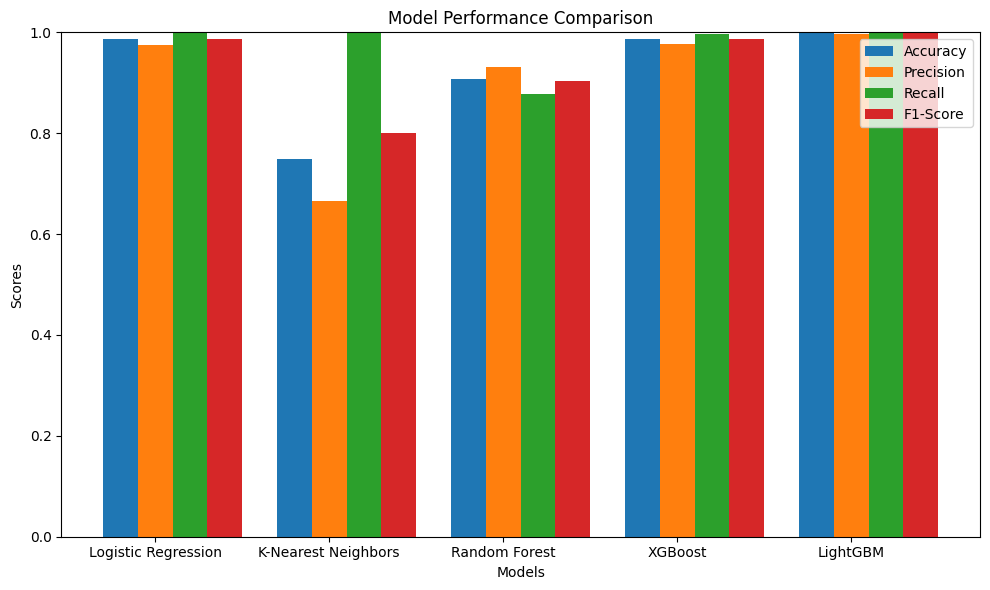

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Storing performance metrics
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'XGBoost', 'LightGBM']
accuracy = [
    accuracy_score(y_test, logistic_y_pred),
    accuracy_score(y_test, knn_y_pred),
    accuracy_score(y_test, rf_y_pred),
    accuracy_score(y_test, xgb_y_pred),
    accuracy_score(y_test, lgb_y_pred),
]

precision = [
    precision_score(y_test, logistic_y_pred),
    precision_score(y_test, knn_y_pred),
    precision_score(y_test, rf_y_pred),
    precision_score(y_test, xgb_y_pred),
    precision_score(y_test, lgb_y_pred),
]

recall = [
    recall_score(y_test, logistic_y_pred),
    recall_score(y_test, knn_y_pred),
    recall_score(y_test, rf_y_pred),
    recall_score(y_test, xgb_y_pred),
    recall_score(y_test, lgb_y_pred),
]

f1 = [
    f1_score(y_test, logistic_y_pred),
    f1_score(y_test, knn_y_pred),
    f1_score(y_test, rf_y_pred),
    f1_score(y_test, xgb_y_pred),
    f1_score(y_test, lgb_y_pred),
]

# Creating a dataframe-like structure
metrics = np.array([accuracy, precision, recall, f1])
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plotting
x = np.arange(len(models))
bar_width = 0.2

plt.figure(figsize=(10, 6))

for i in range(len(metric_names)):
    plt.bar(x + i * bar_width, metrics[i], width=bar_width, label=metric_names[i])

# Formatting
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x + bar_width, models)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.legend()
plt.tight_layout()
plt.show()


In [75]:
import pandas as pd
from IPython.display import display

# Calculate the cross-validation scores for each model
metrics = {
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'LightGBM', 'XGBoost'],
    'Best Accuracy': [
        logistic_cv_scores.mean(),
        knn_cv_scores.mean(),
        rf_cv_scores.mean(),
        lgb_cv_scores.mean(),
        xgb_cv_scores.mean()
    ],
    'Best Parameters': [
        {'max_iter': 500, 'C': 0.1},  # Logistic Regression parameters
        {'n_neighbors': 2},  # KNN parameters
        {'n_estimators': 100, 'max_depth': 5},  # Random Forest parameters
        {'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.1, 'n_estimators': 100},  # LightGBM parameters
        {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.8}  # XGBoost parameters
    ]
}

# Create DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# Display the comparison table with better formatting
print("\nComparison Table")
styled_table = metrics_df.style.set_caption("Comparison Table").set_table_styles(
    [
        {'selector': 'caption', 'props': 'font-size:16px; color: black; font-weight: bold; text-align: center;'},
        {'selector': 'th', 'props': 'text-align: center; background-color: #333; color: white;'},
        {'selector': 'td', 'props': 'text-align: center;'},
        {'selector': 'table', 'props': 'border-collapse: collapse; width: 100%; font-size: 14px;'}
    ]
).format("{:.4f}", subset=['Best Accuracy'])  # Format numeric values for accuracy

# Display the styled table
display(styled_table)



Comparison Table


,Model,Best Accuracy,Best Parameters
0,Logistic Regression,0.9708,"{'max_iter': 500, 'C': 0.1}"
1,KNN,0.6695,{'n_neighbors': 2}
2,Random Forest,0.8833,"{'n_estimators': 100, 'max_depth': 5}"
3,LightGBM,0.9954,"{'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.1, 'n_estimators': 100}"
4,XGBoost,0.9846,"{'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.8}"


# Hyperparameter Tuning

In [ ]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Define hyperparameter grids for each model

# Logistic Regression
logistic_param_grid = {
    'C': [0.1, 1, 10],          # Regularization strength
    'max_iter': [100, 200, 500] # Maximum number of iterations
}

# K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [2, 5, 10],             # Number of neighbors
    'weights': ['uniform', 'distance'],    # Weight function
    'metric': ['euclidean', 'manhattan']   # Distance metric
}

# Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],    # Number of trees
    'max_depth': [None, 5, 10],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]    # Minimum number of samples required to split an internal node
}

# XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],    # Number of trees
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 6, 9],            # Maximum depth of the trees
    'subsample': [0.6, 0.8, 1.0],      # Subsample ratio of training instances
    'colsample_bytree': [0.6, 0.8, 1.0] # Subsample ratio of features
}

# LightGBM
lgb_param_grid = {
    'num_leaves': [15, 31, 63],    # Number of leaves
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'n_estimators': [50, 100, 200],    # Number of boosting iterations
    'max_depth': [-1, 5, 10]           # Maximum depth of trees
}

# Perform GridSearchCV for each model
def perform_grid_search(model, param_grid, X_train, y_train, model_name):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    # Save the best model to a .pkl file
    with open(f'{model_name}_best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print(f"Best {model_name} Parameters: {grid_search.best_params_}")
    return best_model

# Tuning Logistic Regression
best_logistic = perform_grid_search(LogisticRegression(), logistic_param_grid, X_train, y_train, "logistic_regression")

# Tuning KNN
best_knn = perform_grid_search(KNeighborsClassifier(), knn_param_grid, X_train, y_train, "knn")

# Tuning Random Forest
best_rf = perform_grid_search(RandomForestClassifier(random_state=42), rf_param_grid, X_train, y_train, "random_forest")



# Best Model Parameters

## 1. Logistic Regression
- **C**: 0.1
- **Max Iterations**: 100

---

## 2. K-Nearest Neighbors (KNN)
- **Metric**: Manhattan
- **Number of Neighbors**: 2
- **Weights**: Uniform

---

## 3. Random Forest
- **Max Depth**: None
- **Min Samples Split**: 2
- **Number of Estimators**: 100

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import pickle

# Simplified parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 1, 5],
    'reg_lambda': [1, 5, 10],
}

# Simplified randomized search function for XGBoost
def perform_randomized_search_xgb(model, param_grid, X_train, y_train, model_name):
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=5,  # Fewer iterations
        cv=2,      # Fewer cross-validation folds
        scoring='accuracy',
        n_jobs=1,  # Avoid excessive parallel processing
        random_state=42
    )
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    # Save the best model to a .pkl file
    with open(f'{model_name}_best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print(f"Best {model_name} Parameters: {random_search.best_params_}")
    return best_model

# Call with XGBoost
best_xgb = perform_randomized_search_xgb(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, X_train, y_train, "xgboost")


## 4. XGBoost
- **Subsample**: 0.7
- **Reg Lambda**: 1
- **Reg Alpha**: 0
- **Number of Estimators**: 50
- **Max Depth**: 5
- **Learning Rate**: 0.1
- **Gamma**: 0.1
- **Colsample Bytree**: 0.7

In [108]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
import pickle

# Simplified parameter grid for LightGBM
lgbm_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [20, 30],
    'max_depth': [10],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
}

# Simplified randomized search function for LightGBM
def perform_randomized_search_lgbm(model, param_grid, X_train, y_train, model_name):
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=5,  # Fewer iterations
        cv=2,      # Fewer cross-validation folds
        scoring='accuracy',
        n_jobs=1,  # Avoid excessive parallel processing
        random_state=42
    )
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    # Save the best model to a .pkl file
    with open(f'{model_name}_best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print(f"Best {model_name} Parameters: {random_search.best_params_}")
    return best_model

# Call with LightGBM
best_lgbm = perform_randomized_search_lgbm(LGBMClassifier(), lgbm_param_grid, X_train, y_train, "lightgbm")


[LightGBM] [Info] Number of positive: 6805, number of negative: 6806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.932484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89354
[LightGBM] [Info] Number of data points in the train set: 13611, number of used features: 32615
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499963 -> initscore=-0.000147
[LightGBM] [Info] Start training from score -0.000147
[LightGBM] [Info] Number of positive: 6806, number of negative: 6805
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.676898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87107
[LightGBM] [Info] Number of data points in the train set: 13611, number of used features: 31510
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500037 -> initscore=0.000147


## 5. LightGBM
- **Subsample**: 0.7
- **Number of Leaves**: 30
- **Number of Estimators**: 100
- **Max Depth**: 10
- **Learning Rate**: 0.1
- **Colsample Bytree**: 0.7

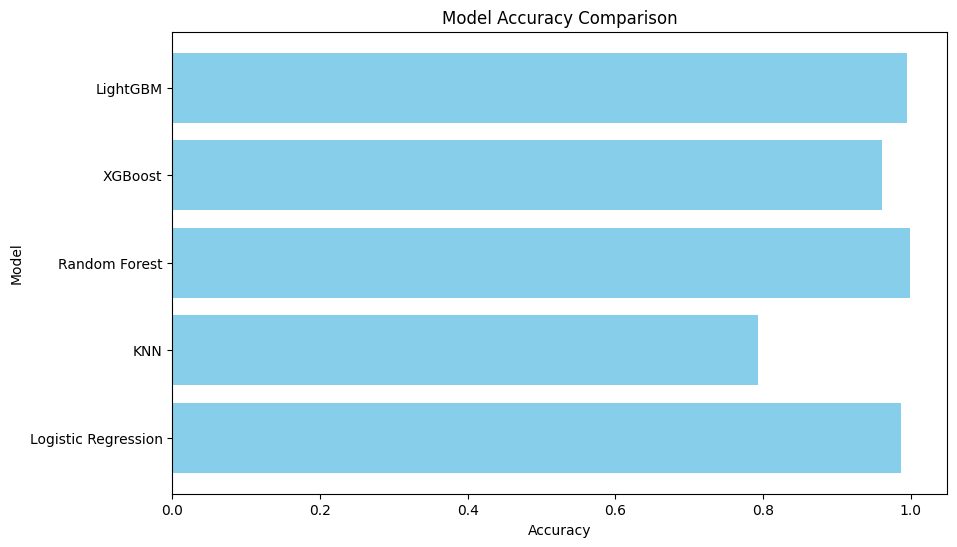

In [116]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the trained models from .pkl files
with open('logistic_regression_best_model.pkl', 'rb') as f:
    best_logistic = pickle.load(f)

with open('knn_best_model.pkl', 'rb') as f:
    best_knn = pickle.load(f)

with open('random_forest_best_model.pkl', 'rb') as f:
    best_rf = pickle.load(f)

with open('xgboost_best_model.pkl', 'rb') as f:
    best_xgb = pickle.load(f)

with open('lightgbm_best_model.pkl', 'rb') as f:
    best_lgb = pickle.load(f)

# Evaluate accuracy on the test data
logistic_accuracy = accuracy_score(y_test, best_logistic.predict(X_test))
knn_accuracy = accuracy_score(y_test, best_knn.predict(X_test))
rf_accuracy = accuracy_score(y_test, best_rf.predict(X_test))
xgb_accuracy = accuracy_score(y_test, best_xgb.predict(X_test))
lgb_accuracy = accuracy_score(y_test, best_lgb.predict(X_test))

# Create a comparison table (list of model names and accuracies)
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost', 'LightGBM']
accuracies = [logistic_accuracy, knn_accuracy, rf_accuracy, xgb_accuracy, lgb_accuracy]

# Plotting the bar chart to compare the models' accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')

# Display the plot
plt.show()
